### Importing required packages

In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,KFold
import matplotlib.pyplot as plt

### Importing file

In [5]:
try:
    df = pd.read_excel("CW_dataset.xlsx")
    print("File is open")
except:
    print("Unable to open file")

File is open


## Visualization

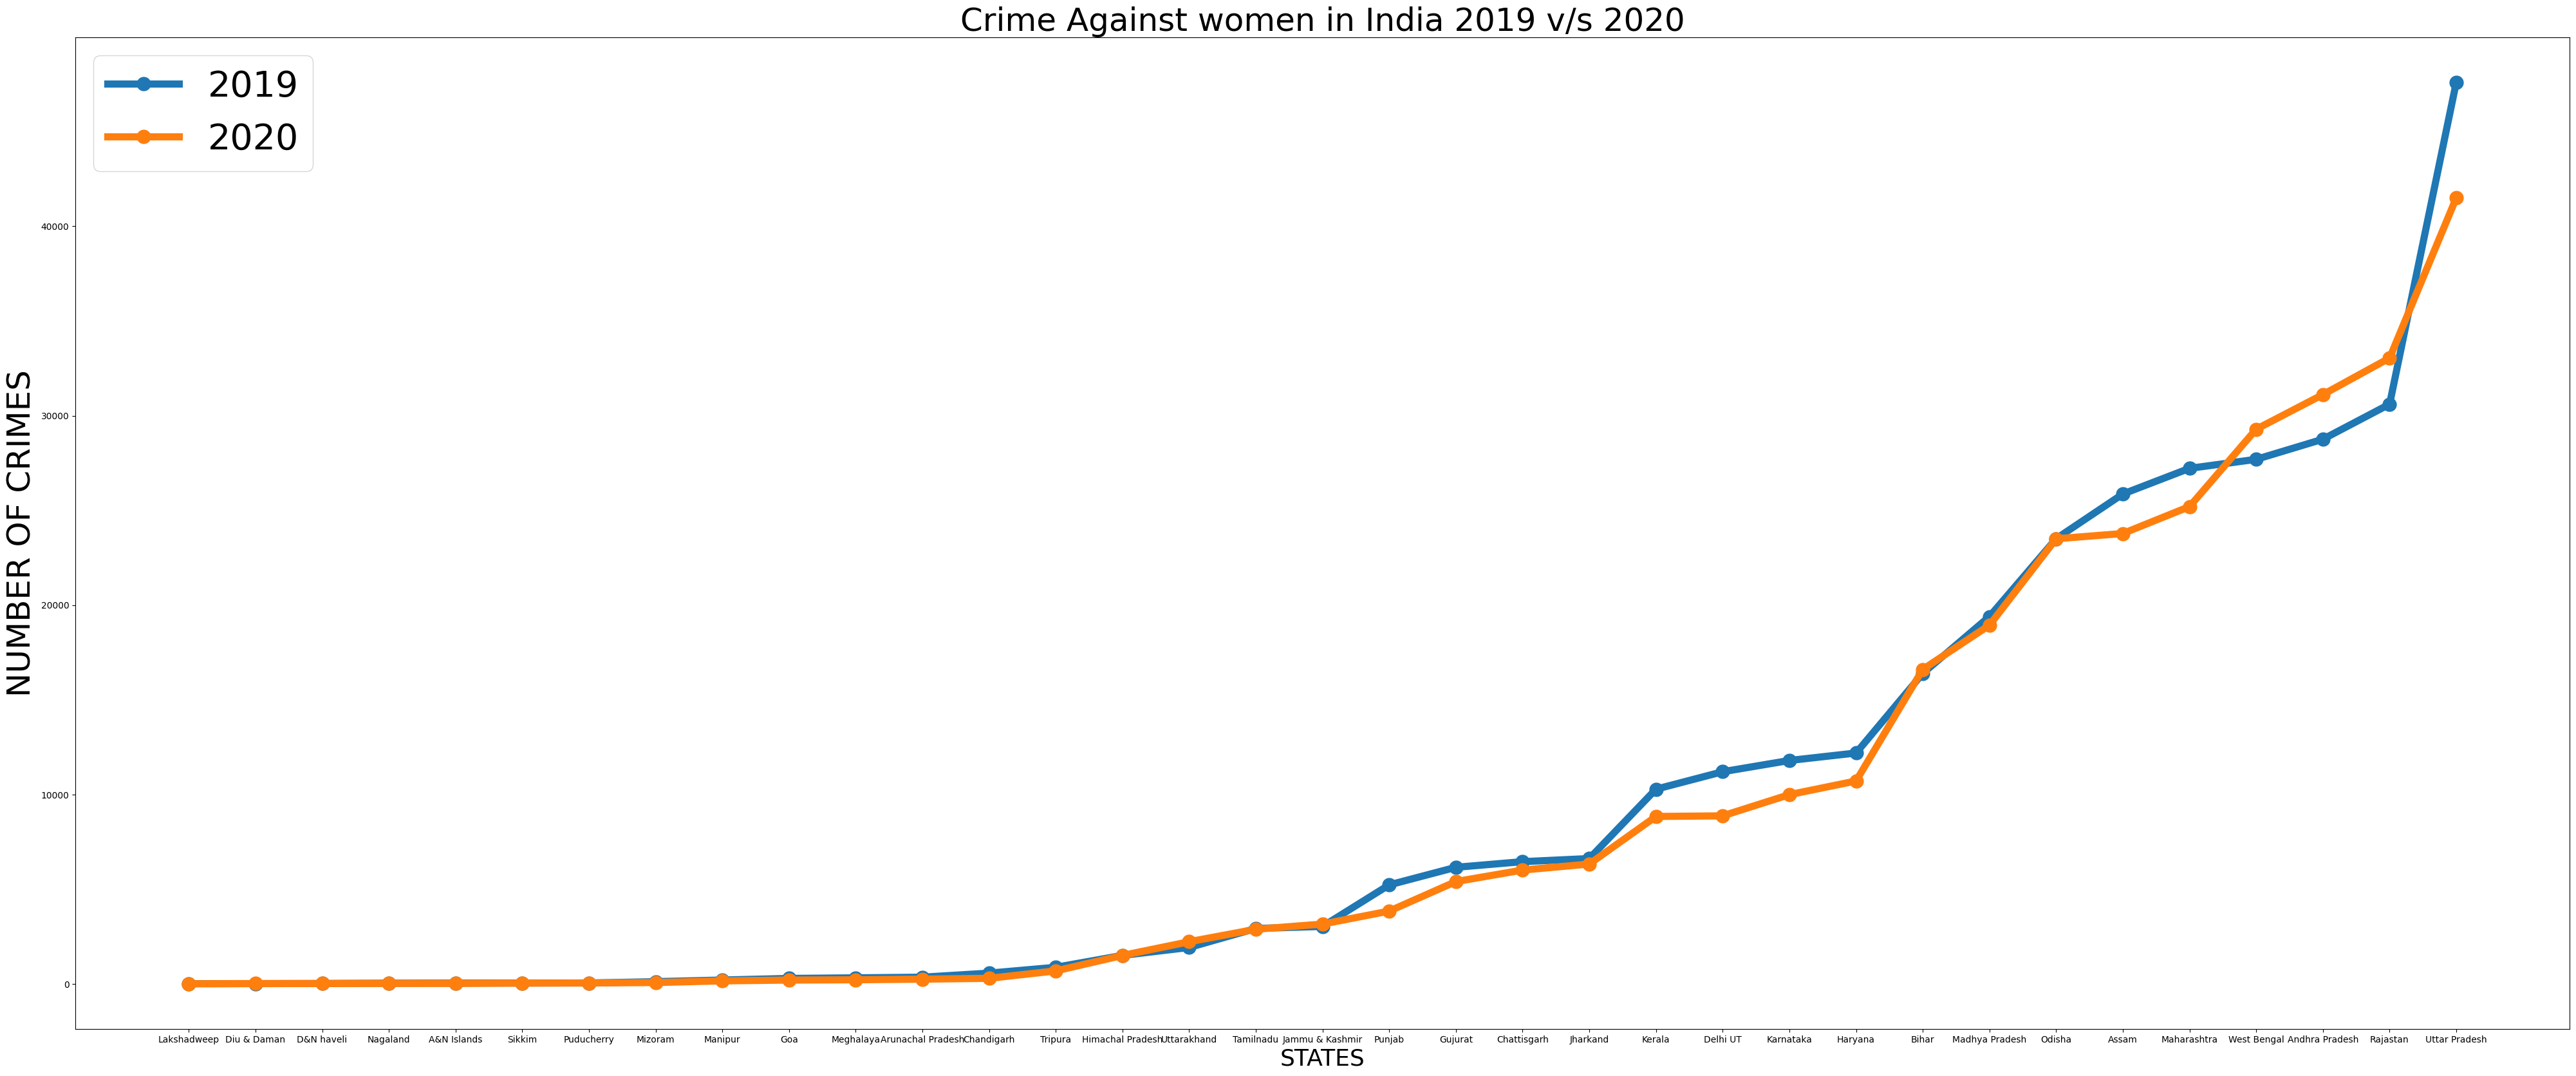

In [6]:
df2019=df.loc[df['Year']==2019]
df2020=df.loc[df['Year']==2020]
x1=df2020['States']
y1=df2019['Total']
y2=df2020['Total']
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(20)
plt.plot(x1,y1,linewidth=8,marker='o',markersize=15,)
plt.plot(x1,y2,linewidth=8,marker='o',markersize=15)
plt.xlabel("STATES",fontdict={'fontsize':26})
plt.ylabel("NUMBER OF CRIMES",fontdict={'fontsize':36})
plt.title("Crime Against women in India 2019 v/s 2020",fontdict={'fontsize':36})
plt.legend(["2019","2020"],prop={'size':40})
plt.show()

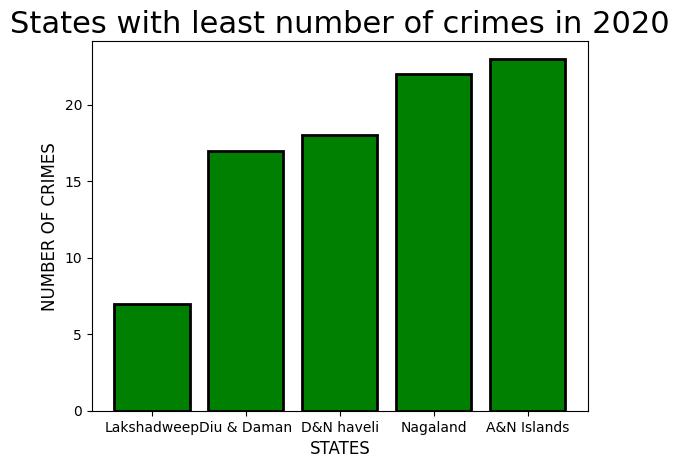

In [7]:
df2020 = df2020.sort_values('Total')
dfleast = df2020.head(5)
x1 = dfleast['States']
y1 = dfleast['Total']
plt.bar(x1,y1,color='Green',edgecolor="Black",linewidth=2)
plt.xlabel("STATES",fontdict={'fontsize':12})
plt.ylabel("NUMBER OF CRIMES",fontdict={'fontsize':12})
plt.title("States with least number of crimes in 2020",fontdict={'fontsize':22})
plt.show()

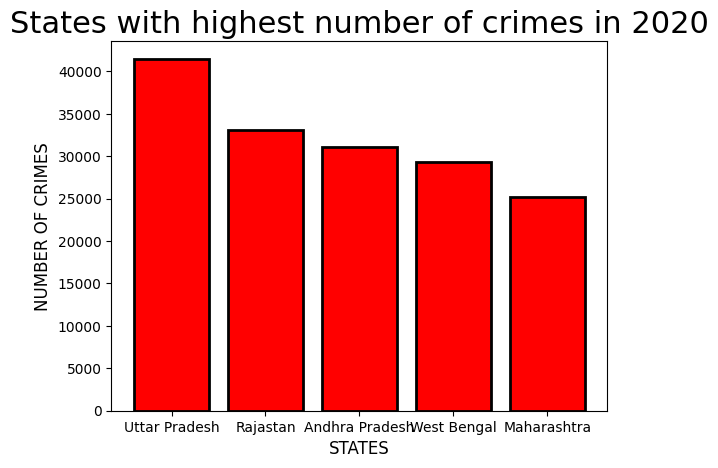

In [8]:
df2020 = df2020.sort_values('Total',ascending=False)
dfleast = df2020.head(5)
x1 = dfleast['States']
y1 = dfleast['Total']
plt.bar(x1,y1,color='Red',edgecolor="Black",linewidth=2)
plt.xlabel("STATES",fontdict={'fontsize':12})
plt.ylabel("NUMBER OF CRIMES",fontdict={'fontsize':12})
plt.title("States with highest number of crimes in 2020",fontdict={'fontsize':22})
plt.show()

### Applying Label encoder(*Data  Transformation*)

In [9]:
le =  LabelEncoder()
df.iloc[:,0] = le.fit_transform(df.iloc[:,0])
x = df.iloc[:,0:2]
y = df.iloc[:,12]
df.head(300)

,States,Year,Rape,Kidnapping and Abduction of women,Dowry deaths,Assault on Women with intent to outrage her Modesty,Insult to the Modesty of Women,Cruelty by husband or his relatives,Importation of Girls from Foreign Country,"Dowry Prohibition act,1961","Indecent Representation of Women (Prohibition) Act, 1986",Comission of Sati prevention act 1987,Total
0,18,2011,0,0,0,0,0,0,0,0,0,0,0
1,18,2012,0,0,0,1,0,1,0,0,0,0,2
2,18,2017,0,0,0,0,0,2,0,0,0,0,2
3,18,2013,2,0,0,1,0,0,0,0,0,0,3
4,18,2014,1,0,0,1,2,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,25,2020,1211,3775,320,12605,615,3659,0,1312,3,0,23500
296,19,2019,5490,6137,550,5607,175,5487,0,59,0,0,23505
297,32,2012,1963,7910,2244,3247,8,7661,0,505,0,0,23538
298,20,2013,3063,1874,320,8132,1632,8542,0,43,0,0,23606


### Test train split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=50)

### **Gradient-Boosting Regressor** - Model building and prediction

In [11]:
model = GradientBoostingRegressor(n_estimators=1034,max_depth=4,subsample=0.7,random_state=50).fit(x_train, y_train)
predicted = model.predict(x_test)
errors = [metrics.mean_squared_error(y_test, predicted) for predicted in 
         model.staged_predict(x_test)]
predicted
model.predict([[3,2022]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([23838.5645367])

### K-fold Cross Validation of Model(*using 10 folds*)

In [12]:
kf = KFold(n_splits=10,shuffle=True,random_state=10)
sc = cross_val_score(model,x,y,cv=kf)
sc

array([0.98413051, 0.99446734, 0.96445813, 0.98614139, 0.97280341,
       0.98559801, 0.97267125, 0.9881689 , 0.98905185, 0.99353052])

### **Results**

In [13]:
print("R2_Score(Accuracy of prediction): ",metrics.r2_score(y_test,predicted)*100)
print("Cross Validation Score: %.2f"%(sc.mean()*100))
print("MSE",np.sqrt(metrics.mean_squared_error(y_test,predicted)))
print("Mean Absolute Error %.2f"%(metrics.mean_absolute_error(y_test,predicted)))

R2_Score(Accuracy of prediction):  98.75291542814372
Cross Validation Score: 98.31
MSE 1076.9878938178463
Mean Absolute Error 624.75
